In [1]:
import numpy as np
import pandas as pd
from Finanzen.Portfolio import Portfolio
import Finanzen.Tools as tl

from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib

# Define Portfolio and weights

In [2]:
a = ['AMZN', 'GOOG', 'WMT', 'TSLA', 'META']
weights = [2.5, 1, 1, 1, 1]

weighted_assets = tl.lists2dict(a, weights)

P = Portfolio(assets=weighted_assets)
print(P.returns)

[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  5 of 5 completed

Ticker          AMZN      GOOG       META       TSLA       WMT
Date                                                          
2023-11-07  2.970001  0.949997   3.016815   2.909988  0.254848
2023-11-08 -0.630005  0.860001   0.958984  -0.069992 -0.446812
2023-11-09 -1.479996 -1.569992   0.769165 -12.130005 -0.125774
2023-11-10  2.959991  2.369995   8.211304   4.669998  0.751312
2023-11-13 -0.970001 -0.419998   0.419556   9.060013  0.493149
...              ...       ...        ...        ...       ...
2024-04-29  1.340012 -5.790009 -10.670013  25.760010  0.080002
2024-04-30 -5.960007 -3.259995  -2.449982 -10.770004 -0.890003
2024-05-01  4.000000  0.930008   9.019989  -3.289993 -0.500000
2024-05-02  5.720001  2.889999   2.489990   0.019989  0.860001
2024-05-03  1.490005  0.529999  10.279999   1.180008  0.110001

[123 rows x 5 columns]


In [ ]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
df = P.returns

fig, ax = plt.subplots()
ax.set_ylabel("Volume")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator())

for c in df.columns:
    ax.bar(df.index, df[c])

plt.show()

In [ ]:
df = P.returns

#df.plot(kind="bar", figsize=(10,6), ylabel="Returns", xlabel="Time", subplots=False)
df.plot(kind="hist", bins=50, alpha=0.6, figsize=(10,6), ylabel="Returns", xlabel="Time")
df.plot(kind="box",vert=False , figsize=(10,6), ylabel="Asset", xlabel="Returns distr.")
df.plot(kind="area", stacked=False, figsize=(10,6), ylabel="Returns", xlabel="Time")



In [ ]:
#ax = P.returns.plot(kind="bar", figsize=(10, 6))
#ax.set_xlabel('Time')
#ax.legend(ncol=5)
#ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
#ax.xaxis.set_major_formatter(
#    matplotlib.dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
#ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%b'))
#plt.show()

# Basic statistics of the portfolio

In [3]:
pprint(P.total_prices())

Ticker            AMZN        GOOG        META        TSLA        WMT  \
Date                                                                    
2023-11-06  139.740005  131.449997  315.465271  219.270004  54.570774   
2023-11-07  142.710007  132.399994  318.482086  222.179993  54.825623   
2023-11-08  142.080002  133.259995  319.441071  222.110001  54.378811   
2023-11-09  140.600006  131.690002  320.210236  209.979996  54.253036   
2023-11-10  143.559998  134.059998  328.421539  214.649994  55.004349   
...                ...         ...         ...         ...        ...   
2024-04-29  180.960007  167.899994  432.619995  194.050003  60.240002   
2024-04-30  175.000000  164.639999  430.170013  183.279999  59.349998   
2024-05-01  179.000000  165.570007  439.190002  179.990005  58.849998   
2024-05-02  184.720001  168.460007  441.679993  180.009995  59.709999   
2024-05-03  186.210007  168.990005  451.959991  181.190002  59.820000   

Ticker      AMZN_total  GOOG_total  WMT_total  TSL

In [4]:
# Variance of Portfolio return
sigma = P.correlation_matrix(True)
w = P.weight_vector()
sigma_total = np.matmul(np.matmul(w, sigma), w.T)

print(w, sigma_total)

[[0.38461538 0.15384615 0.15384615 0.15384615 0.15384615]] [[0.42715686]]


In [12]:
df = pd.concat([P.expected_return(), P.excpected_risk()], axis=1)
df.columns=["Expected Return", "Risk"]
df

,Expected Return,Risk
Ticker,,
AMZN,0.377805,2.576104
GOOG,0.305203,2.734008
META,1.109713,11.297060
TSLA,-0.309594,6.375101
WMT,0.042677,0.635251


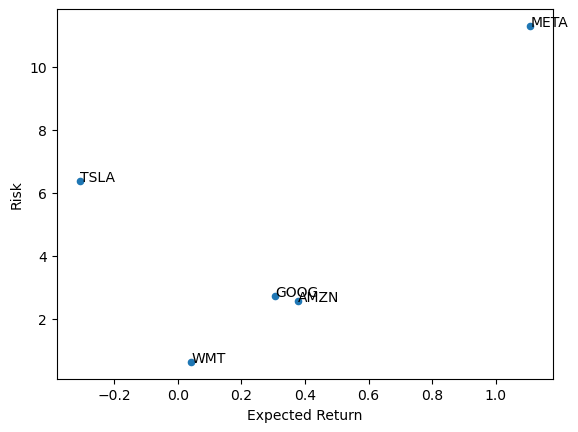

In [16]:
fig, ax = plt.subplots()
df.plot("Expected Return", "Risk", kind="scatter", ax=ax)

for k, v in df.iterrows():
    ax.annotate(k, v)